In [6]:
import matplotlib.pyplot as plt
import numpy as np
from cvxpy import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def diff(n, k=1):
    """ Construct kth order difference matrix with shape (n-k, n) 
    """
    D = np.diag(-1*np.ones(n)) + np.diag(np.ones(n-1),1)
    D = D[:-1,:]
    if k > 1:
        return diff(n-1,k-1).dot(D)
    else:
        return D

# Huber loss
- huber function allows us to better handle these outliers
- defined as
$$
h_M(x) = \begin{cases}x^2 &|x| \leq M \\2M|x| - M^2&|x| >M\end{cases}
$$
- usual quadratic loss in interval $[-M, M]$
- linear loss for $|x| > M$
- linear penalty for large errors is much less severe than quadratic
- large errors are better 'tolerated', have less influence on fit

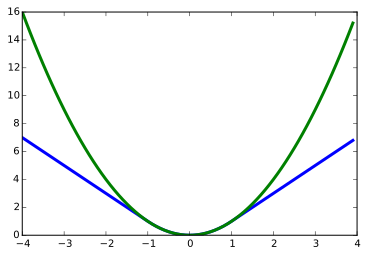

In [8]:
x = np.arange(-4,4,.1)
y = huber(x).value
z = x**2
plt.plot(x,y, linewidth=3)
plt.plot(x,z, linewidth=3)
plt.savefig('fig/huber-1.pdf')

# Huber example
- same curve fitting example as before, except data contains some extreme outliers
- penalize closeness to data with huber function $h_M$ to reduce influence of outliers in fit
- solve
$$
\begin{array}{ll}
\mbox{minimize} & \sum_{i=1}^n h_M(x_i-y_i) + \rho \|Dx\|_2^2
\end{array}
$$
- $M$ parameter controls width of quadratic region, or "non-outlier" errors

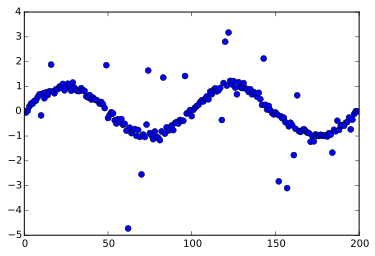

In [12]:
np.random.seed(1000)
n = 200
percent_noise = .10 # percentage of points which have high noise (outliers)
noise1 = .1 # regular noise
noise2 = 2 # outlier noise


t = np.linspace(0, 4*np.pi, n)
y = np.sin(t)

# select which observations will be outliers
s = int(n*percent_noise)
p = np.random.permutation(n)
noise = np.zeros(n)

# high noise
noise[p[:s]] += noise2*np.random.randn(s)
# low noise
noise[p[s:]] += noise1*np.random.randn(n-s)

y += noise

plt.plot(y,'o')
plt.savefig('fig/huber-2.pdf')

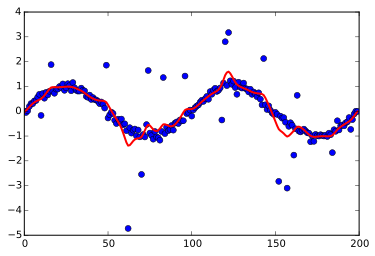

In [13]:
# get second-order difference matrix
D = diff(n, 2)
rho = 20

x = Variable(n)
obj = sum_squares(x-y) + rho*sum_squares(D*x)
Problem(Minimize(obj)).solve()
x = np.array(x.value).flatten()

plt.plot(y,'o', alpha=.5)
plt.plot(x,'r-', linewidth=2)
plt.savefig('fig/huber-3.pdf')

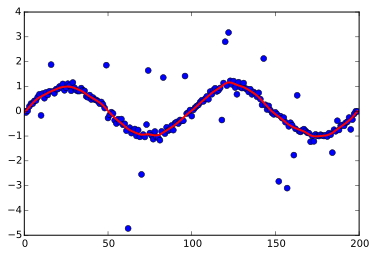

In [15]:
# get second-order difference matrix
D = diff(n, 2)
rho = 20
M = .15 # huber radius

x = Variable(n)
obj = sum_entries(huber(x-y, M)) + rho*sum_squares(D*x)
Problem(Minimize(obj)).solve()
x = np.array(x.value).flatten()

plt.plot(y,'o', alpha=.5)
plt.plot(x,'r-', linewidth=2)
plt.savefig('fig/huber-4.pdf')